# Visualisation of logs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data import and normalisation

In [2]:
import pandas as pd

logs_raw = pd.read_json('data/logs.json')
logs_raw.head()

,timestamp,action,httpRequest,host
0,211256,ALLOW,"{'clientIp': '172.6.20.69', 'country': 'PH', '...",www.f81C.de
1,248639,ALLOW,"{'clientIp': '13.181.79.103', 'country': 'PH',...",www.Ip8n.de
2,152940,ALLOW,"{'clientIp': '168.199.225.84', 'country': 'PH'...",www.WN9V.de
3,147516,ALLOW,"{'clientIp': '127.199.221.38', 'country': 'PH'...",www.J6Nj.de
4,149819,ALLOW,"{'clientIp': '34.77.119.65', 'country': 'PH', ...",www.NoE6.de


In [3]:
# Auflösen der 'data'-Spalte
normalized_logs_raw = pd.json_normalize(logs_raw['httpRequest'])

# Zusammenführen mit der ursprünglichen ID
logs = pd.concat([logs_raw, normalized_logs_raw], axis=1)
logs.drop(['httpRequest'], axis=1, inplace=True)
logs.head()

,timestamp,action,host,clientIp,country,uri
0,211256,ALLOW,www.f81C.de,172.6.20.69,PH,/placeholder
1,248639,ALLOW,www.Ip8n.de,13.181.79.103,PH,/placeholder
2,152940,ALLOW,www.WN9V.de,168.199.225.84,PH,/placeholder
3,147516,ALLOW,www.J6Nj.de,127.199.221.38,PH,/placeholder
4,149819,ALLOW,www.NoE6.de,34.77.119.65,PH,/placeholder


In [4]:
all_client_ips = logs['clientIp'].unique()
all_hosts = logs['host'].unique()

## Visualise (number of Requests / host) for on client ip

In [42]:
logs1 = logs.copy()
logs1 = logs1.groupby(['clientIp', 'host']).size().reset_index(name='count')

logs1

,clientIp,host,count
0,100.106.22.152,www.CLFs.de,1
1,100.106.22.152,www.Ip8n.de,1
2,100.106.22.152,www.UDsx.de,1
3,104.215.18.178,www.44LC.de,2
4,104.215.18.178,www.CLFs.de,2
...,...,...,...
800,97.172.166.199,www.UDsx.de,3
801,97.172.166.199,www.WN9V.de,4
802,97.172.166.199,www.f81C.de,4
803,97.172.166.199,www.qyEP.de,2


### Example for one single clientIp

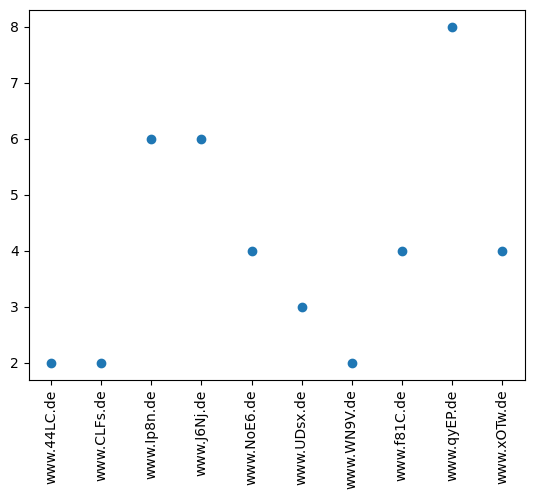

In [45]:
df1 = logs1[logs1['clientIp'] == '104.215.18.178']

plt.scatter(df1['host'], df1['count'])

plt.xticks(rotation=90)
plt.show()

### Example for multiply clientIps

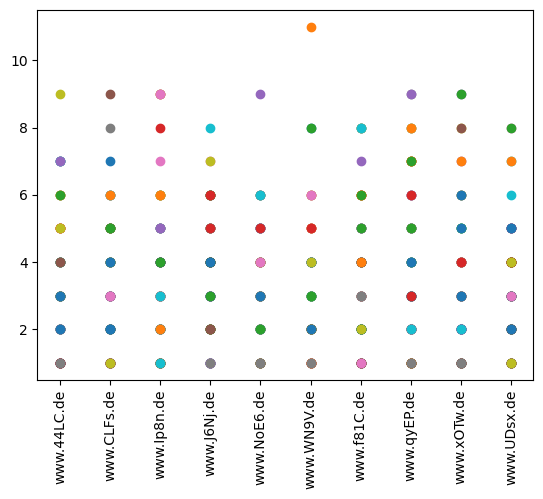

In [47]:
for client in all_client_ips:
    df2 = logs1[logs1['clientIp'] == client]
    plt.scatter(df2['host'], df2['count'], label=client)

plt.xticks(rotation=90)
#plt.legend()
plt.show()

## Visualise (number of Requests / clientIp) for on host

In [52]:
logs2 = logs.copy()
logs2 = logs2.groupby(['host', 'clientIp']).size().reset_index(name='count')

logs2

,host,clientIp,count
0,www.44LC.de,104.215.18.178,2
1,www.44LC.de,110.193.215.48,2
2,www.44LC.de,115.147.226.201,5
3,www.44LC.de,118.224.87.137,3
4,www.44LC.de,118.45.72.40,7
...,...,...,...
800,www.xOTw.de,78.129.91.226,4
801,www.xOTw.de,8.212.139.166,2
802,www.xOTw.de,94.8.150.15,1
803,www.xOTw.de,95.249.153.156,3


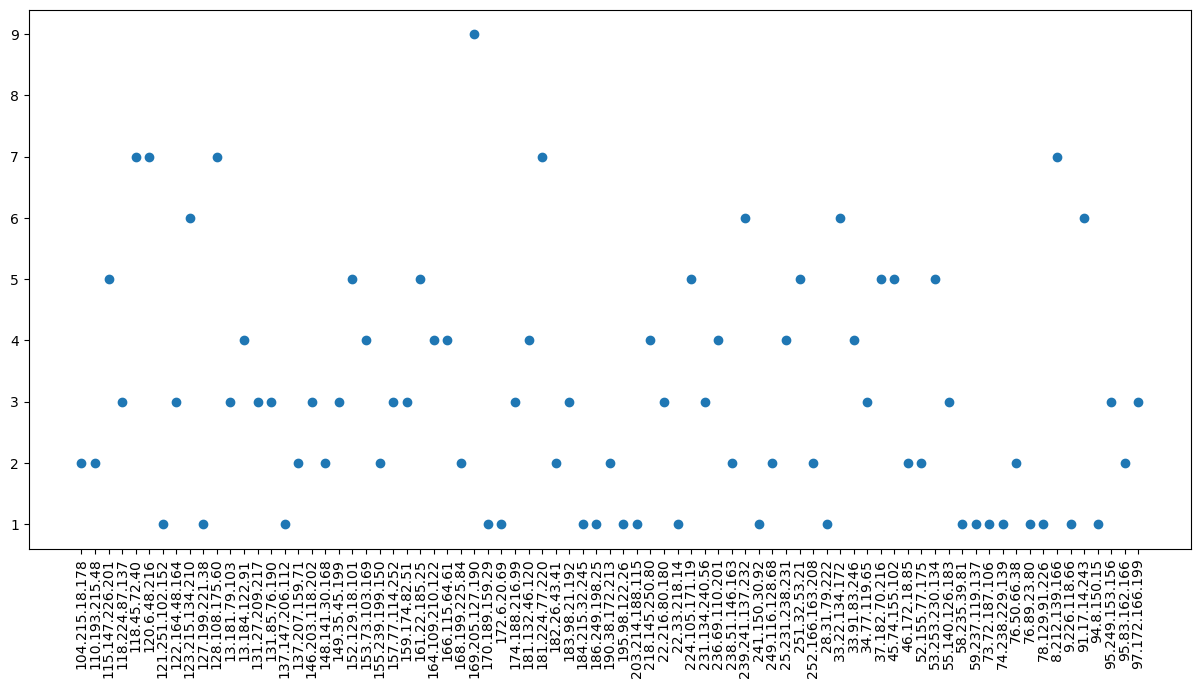

In [60]:
plt.figure(figsize=(15, 7))

df2 = logs2[logs2['host'] == 'www.44LC.de']
plt.scatter(df2['clientIp'], df2['count'])

plt.xticks(rotation=90)
plt.show()

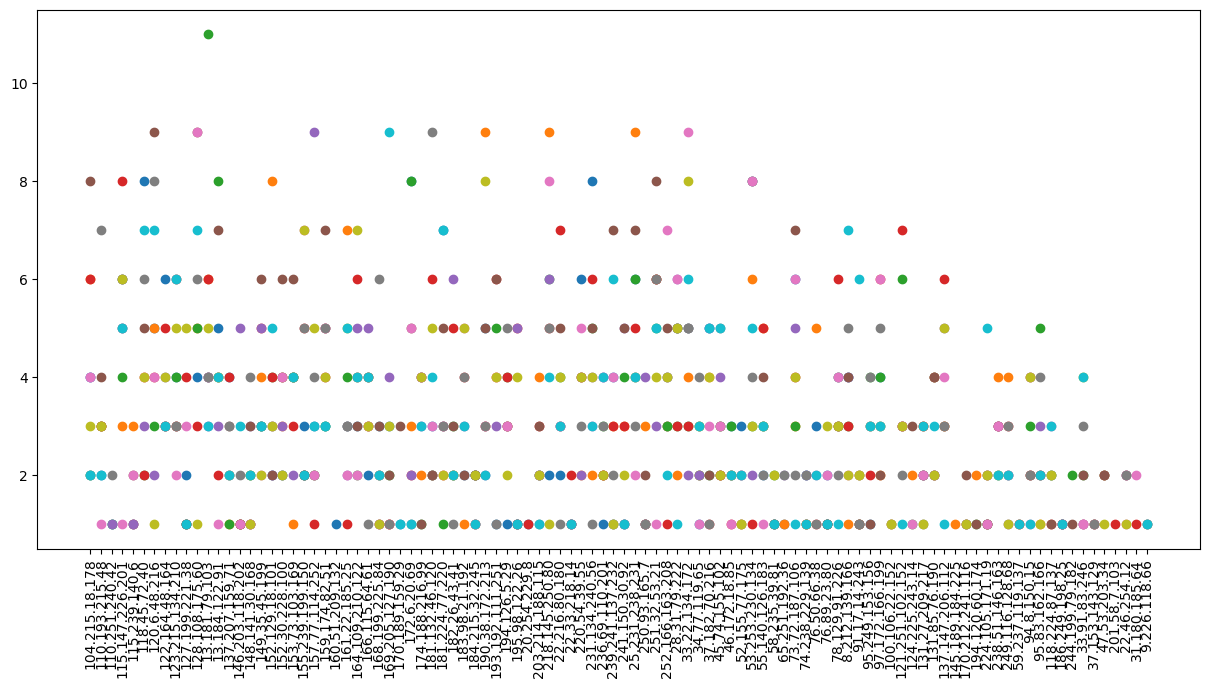

In [61]:
plt.figure(figsize=(15, 7))

for host in all_hosts:
    df2 = logs1[logs1['host'] == host]
    plt.scatter(df2['clientIp'], df2['count'], label=host)

plt.xticks(rotation=90)
#plt.legend()
plt.show()

## Feature selection

In [48]:
iteration_amount = 5

In [56]:
logs3 = logs.copy()
logs3 = logs3.sort_values(by=['host', 'clientIp', 'timestamp'])
#logs3 = logs3.groupby(['host', 'clientIp']).size().reset_index(name='count')

l3T = pd.DataFrame({
    'host': [],
    'clientIp': [],
    'timestamp_min': [],
    'timestamp_max': [],
    'time_active': [],
    'count': []
})

for host in all_hosts:
    logs3_hosts = logs3[logs3['host'] == host]
    
    for client in logs3_hosts['clientIp'].unique():
        logs3_host_client = logs3_hosts[logs3_hosts['clientIp'] == client]
        line = {
            'host': host,
            'clientIp': client,
            'timestamp_min': logs3_host_client['timestamp'].min(),
            'timestamp_max': logs3_host_client['timestamp'].max(),
            'time_active': logs3_host_client['timestamp'].max() - logs3_host_client['timestamp'].min(),
            'count': len(logs3_host_client)
        }
        l3T.loc[len(l3T)] = line
        
l3T


,host,clientIp,timestamp_min,timestamp_max,time_active,count
0,www.f81C.de,104.215.18.178,48295,286809,238514,4
1,www.f81C.de,110.193.215.48,189303,228127,38824,2
2,www.f81C.de,110.251.240.42,51088,51088,0,1
3,www.f81C.de,115.147.226.201,34296,104285,69989,6
4,www.f81C.de,115.239.140.6,225932,225932,0,1
...,...,...,...,...,...,...
800,www.44LC.de,91.17.14.243,190826,285847,95021,6
801,www.44LC.de,94.8.150.15,179197,179197,0,1
802,www.44LC.de,95.249.153.156,154050,299993,145943,3
803,www.44LC.de,95.83.162.166,68890,126486,57596,2


In [61]:
l3T.to_csv('data/l3T.csv', index=False)

### rebuilt of (amount of requests / client) for hosts

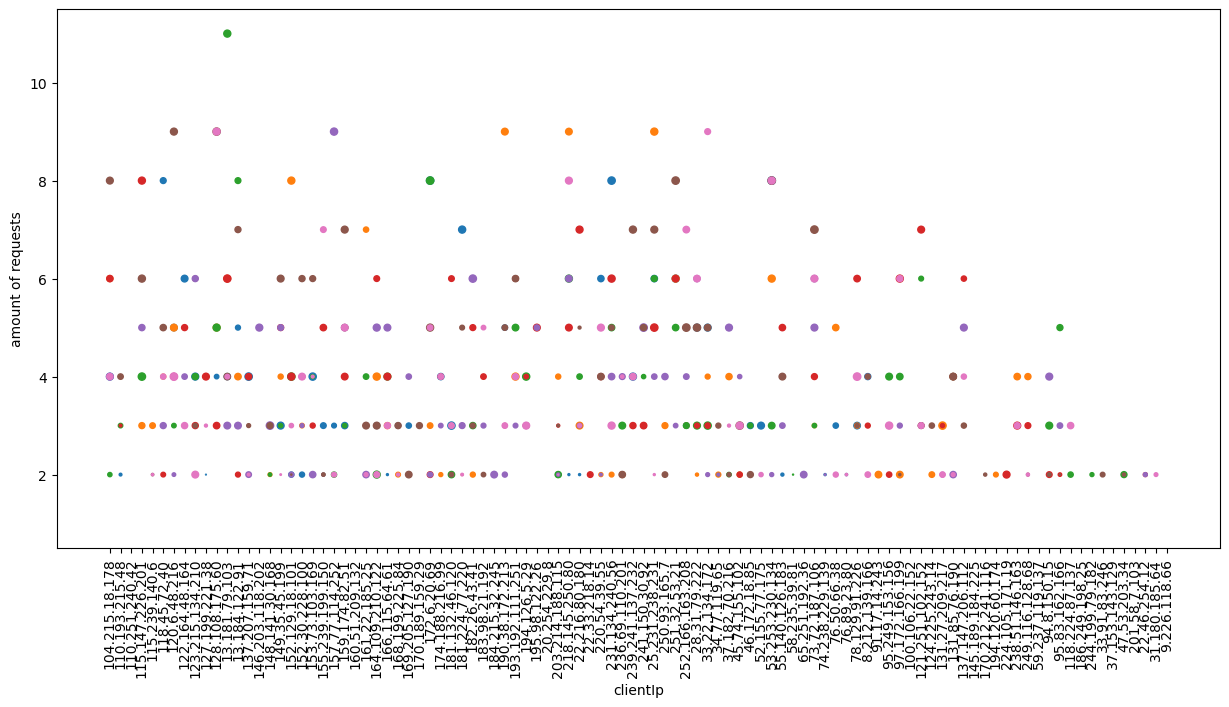

In [55]:
plt.figure(figsize=(15, 7))

iterator = 0
for host in all_hosts:
    df3 = l3T[l3T['host'] == host]
    plt.scatter(df3['clientIp'], df3['count'], label=host, s=df3['time_active']/10000)
    if iterator > iteration_amount:
        break
    iterator += 1

plt.xticks(rotation=90)
plt.ylabel('amount of requests')
plt.xlabel('clientIp')
#plt.legend()
plt.show()

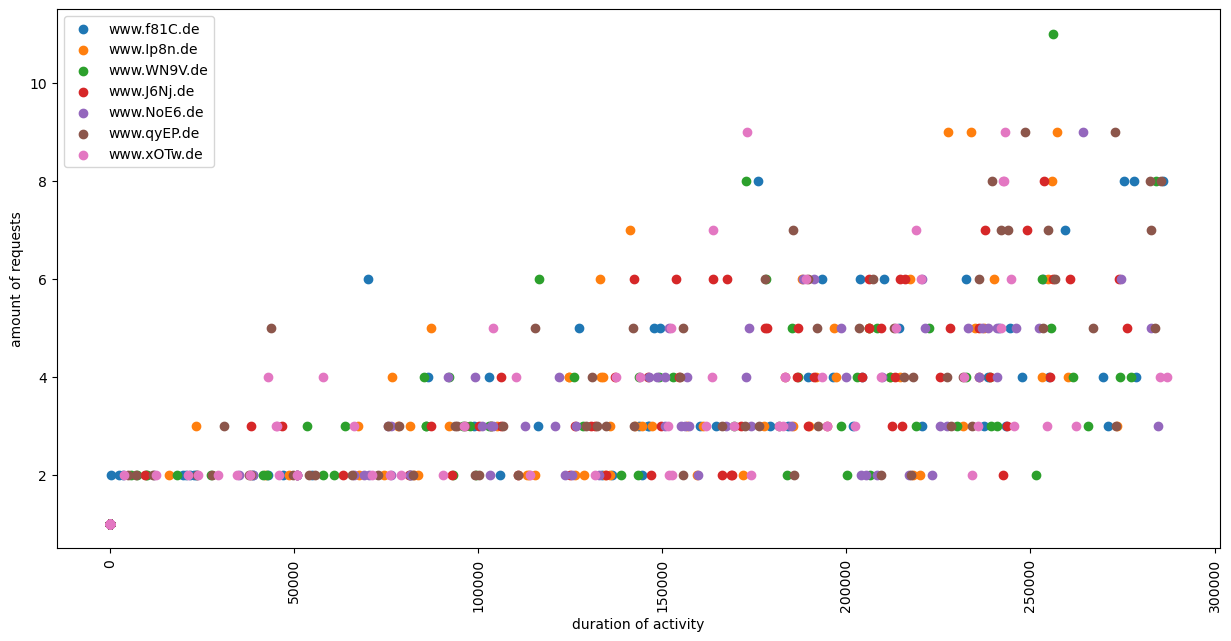

In [54]:
plt.figure(figsize=(15, 7))

iterator = 0
for host in all_hosts:
    df3 = l3T[l3T['host'] == host]
    plt.scatter(df3['time_active'], df3['count'], label=host)
    
    if iterator > iteration_amount:
        break
    iterator += 1

plt.xticks(rotation=90)
plt.ylabel('amount of requests')
plt.xlabel('duration of activity')
plt.legend()
plt.show()